# 모델 설계

## 평가 방법

$CSI = \frac{H}{H+F+M}$



In [56]:
import numpy as np

a = np.arange(10).reshape(-1,1)

b = np.arange(10).reshape(-1,1)

a.shape
np.sum(a.reshape(-1))

45

## Model 1: max(V0-V9)



In [112]:
import pandas as pd

# 데이터 읽어오기
df = pd.read_csv('daegun_first.csv')
#결측치 처리
null_df = df[df['class'] == -999]
df = df[df['class'] != -999]

Text(0.5, 1.0, '무강수 제외 데이터 분포 확인')

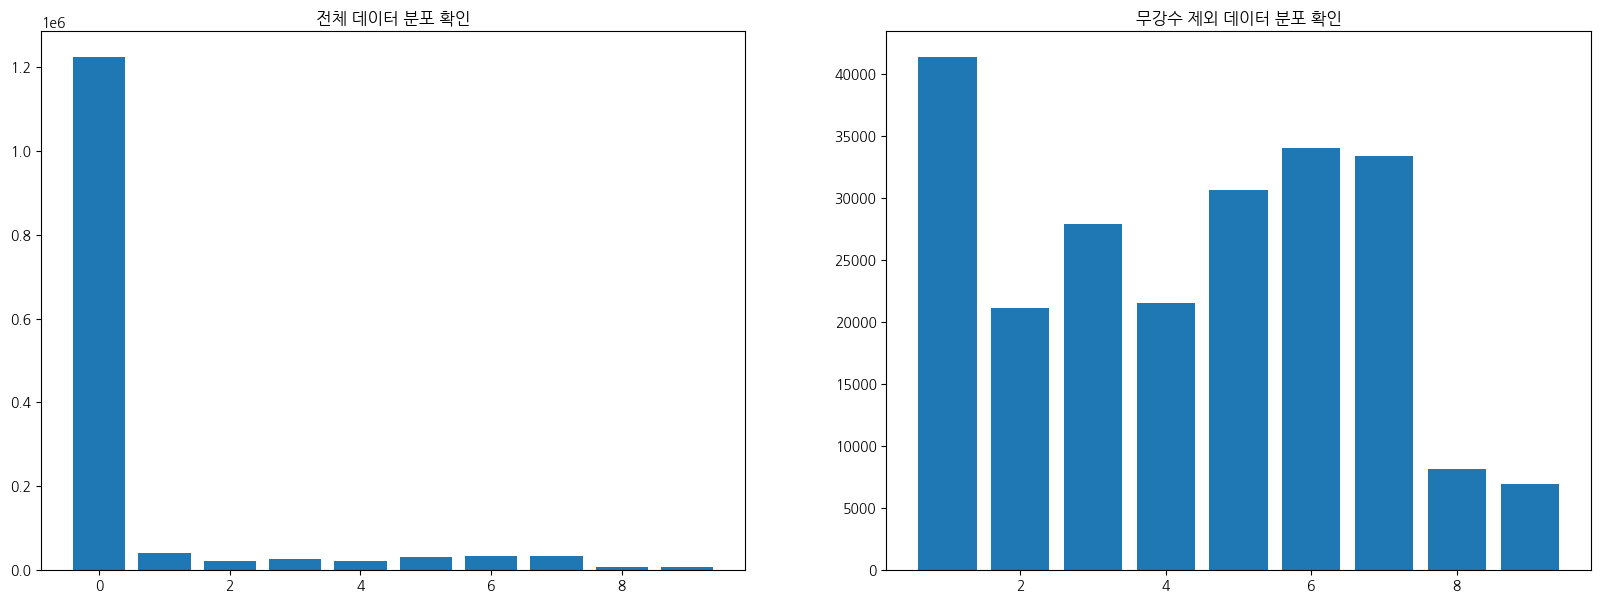

In [113]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] ='NanumGothic'

fig, axes = plt.subplots(ncols=2, figsize=(20,7))
h = df['class'].value_counts().values[np.argsort(df['class'].value_counts().index)]
axes[0].bar(x=df['class'].unique(), height=h)
axes[0].set_title('전체 데이터 분포 확인')
axes[1].bar(x=df['class'].unique()[1:], height=h[1:])
axes[1].set_title('무강수 제외 데이터 분포 확인')
# plt.title("class 별 데이터 분포 가시화")

In [114]:
print(f"무강수 데이터의 개수: {int((df['class'] == 0).sum()/len(df) *100)}% 강수 데이터 개수 : {int((df['class'] != 0).sum()/len(df)*100)}%")  

무강수 데이터의 개수: 84% 강수 데이터 개수 : 15%


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt


전체 데이터 :80.36%

In [116]:
(df['EF_class'] == df['class']).sum() / len(df)

0.8083943394429175

불균형 데이터로 인해서 0으로만 예측해도 기존 모델보다 더 정확하다.

confusion matrix를 사용해야 함


In [117]:
(0 == df['class']).sum() / len(df)

0.8443864485678116

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
target_name = [f"V{i}"for i in range(10)]
# confusion_matrix(df['EF_class'],df['class'])
print(classification_report(df['EF_class'],df['class'],target_names=target_name))

              precision    recall  f1-score   support

          V0       0.94      0.88      0.91   1307439
          V1       0.00      0.05      0.01      2262
          V2       0.06      0.05      0.05     35990
          V3       0.04      0.07      0.05     16781
          V4       0.04      0.10      0.06     13705
          V5       0.17      0.15      0.16     47267
          V6       0.09      0.16      0.11     15991
          V7       0.08      0.19      0.11      8668
          V8       0.01      0.23      0.01       251
          V9       0.02      0.30      0.03       408

    accuracy                           0.81   1448762
   macro avg       0.14      0.22      0.15   1448762
weighted avg       0.86      0.81      0.83   1448762



>DH 값의 변화량에 따른 F1 score

- X 축은 DH, Y축은 F1 score
- plot은 각 Vx 를 표시


In [119]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

f1_score(df['EF_class'],df['class'],labels=[i for i in range(10)], average=None)

array([0.91304884, 0.00881464, 0.05487979, 0.04608936, 0.0557583 ,
       0.15819744, 0.11425321, 0.11268267, 0.01351031, 0.03299973])

In [121]:
import numpy as np

x = df['DH'].unique()
f1 = np.array([])
rc = np.array([])
fc = np.array([])
for j in x:
    f1 = np.append(f1,f1_score(df[df["DH"] == j]['EF_class'], df[df["DH"] == j]['class'], labels=[i for i in range(10)], average=None))
    rc = np.append(rc,recall_score(df[df["DH"] == j]['EF_class'], df[df["DH"] == j]['class'], labels=[i for i in range(10)], average=None))
    fc = np.append(fc,precision_score(df[df["DH"] == j]['EF_class'], df[df["DH"] == j]['class'], labels=[i for i in range(10)], average=None))

f1 = f1.reshape(-1,10)
rc = rc.reshape(-1,10)
fc = rc.reshape(-1,10)

for i in range(10):
    locals()[f"f1_V{i}"] = np.append(x,f1[:,i]).reshape(2,-1)
    locals()[f"rc_V{i}"] = np.append(x,rc[:,i]).reshape(2,-1)
    locals()[f"fc_V{i}"] = np.append(x,fc[:,i]).reshape(2,-1)

/home/david/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/david/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/david/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/david/tensorflow/lib/python3.10

In [15]:
locals()[f"f1_V{0}"][0]

array([  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,  33.,
        36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,  66.,
        69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,  99.,
       102., 105., 108., 111., 114., 117., 120., 123., 126., 129., 132.,
       135., 138., 141., 144., 147., 150., 153., 156., 159., 162., 165.,
       168., 171., 174., 177., 180., 183., 186., 189., 192., 195., 198.,
       201., 204., 207., 210., 213., 216., 219., 222., 225., 228., 231.,
       234., 237., 240.])

Text(0.5, 0, 'DH')

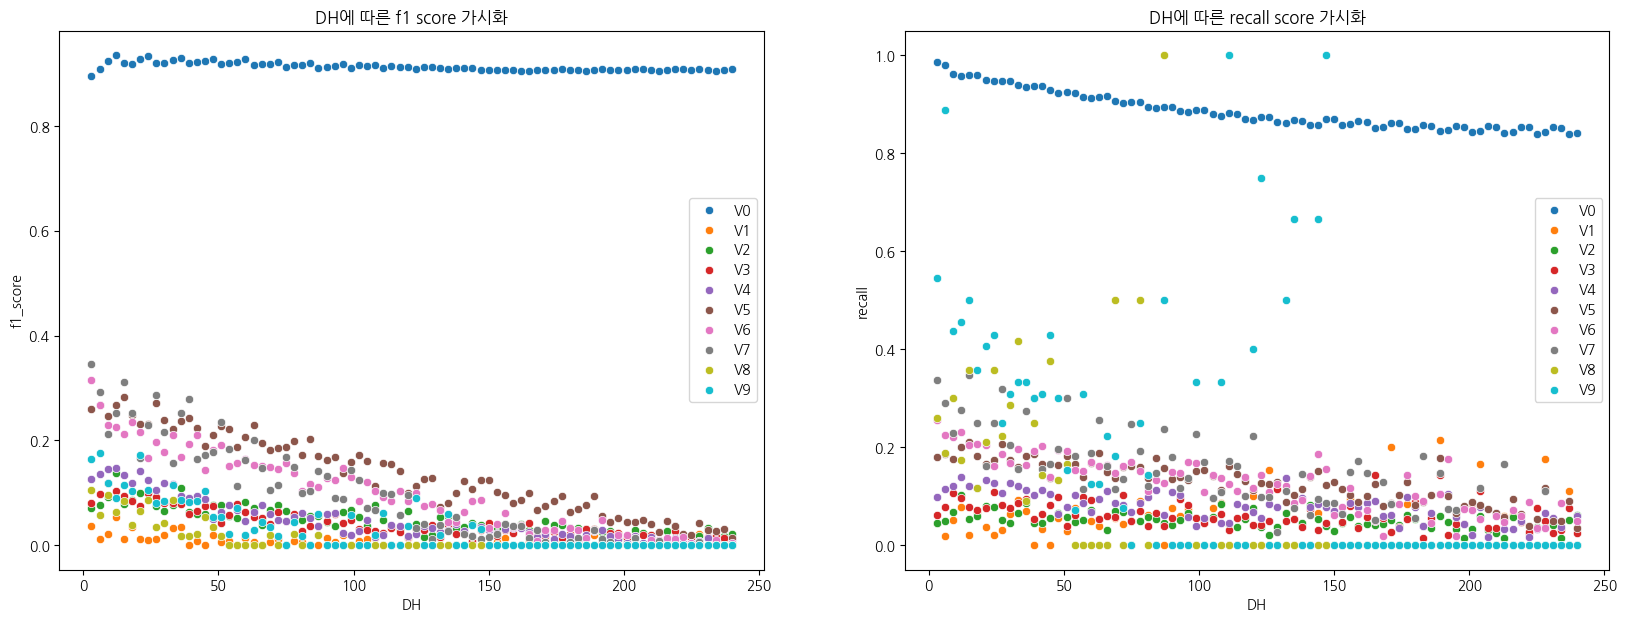

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(20,7))
for i in range(10):
    sns.scatterplot(x=locals()[f"f1_V{i}"][0],y=locals()[f"f1_V{i}"][1],ax=axes[0],label=f"V{i}")
for i in range(10):
    sns.scatterplot(x=locals()[f"rc_V{i}"][0],y=locals()[f"rc_V{i}"][1],ax=axes[1],label=f"V{i}")
axes[0].set_title("DH에 따른 f1 score 가시화")
axes[0].set_ylabel('f1_score')
axes[0].set_xlabel('DH')
axes[1].set_title("DH에 따른 recall score 가시화")
axes[1].set_ylabel('recall')
axes[1].set_xlabel('DH')


Text(0.5, 0, 'DH')

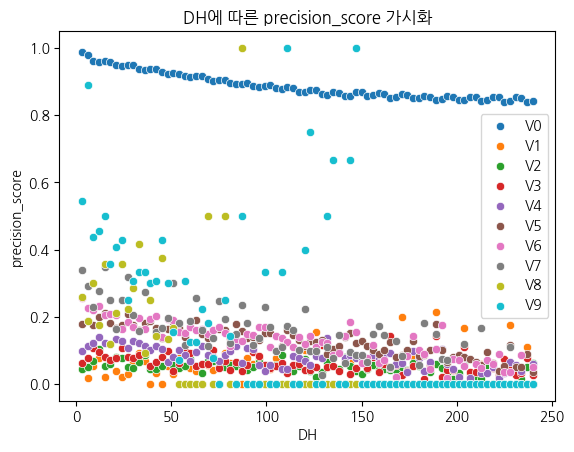

In [124]:
for i in range(10):
    sns.scatterplot(x=locals()[f"fc_V{i}"][0],y=locals()[f"fc_V{i}"][1],label=f"V{i}")
plt.title("DH에 따른 precision_score 가시화")
plt.ylabel("precision_score")
plt.xlabel("DH")

In [63]:
df.groupby(by=['STN'])['DH'].nunique().describe()

count    20.0
mean     80.0
std       0.0
min      80.0
25%      80.0
50%      80.0
75%      80.0
max      80.0
Name: DH, dtype: float64

결국에 우리가 예측할 데이터는 TM_EF, STN 에 해당하는 강수량을 예측하는 것이다.

DH 정보가 달라질 때마다, 예측값이 달라져서는 안됩니다.

날씨를 예측할 때 DH 정보에 기여도를 확인
- DH 3시간 간격으로 240시간씩,  80개의 데이터가 포진 될 수 있음
- 대부분의 데이터가 20개입니다.
- 20개의 데이터도 같은 값을 가지는 것이 아닌 다른 값을 가진다.
- DH를 정보를 기준으로 기여도를 정하는 것은 힘듬

## Model 2 : Randomforest


 강수 무강수를 구분하기 위한 모델
 
 독립변수 입력데이터의 차원을 넓게 볼 필요가 있음.

'TM_EF', 'STN', 'DH' 에 따라서 V0-V9까지의 값이 다르게 나오고

'TM_EF', 'STN' 값에 따라 예측하고자 하는 값에 대해서 나옴.


>   독립변수

```python
{'DH' : 1, 
'V0-9':10,
'EF': 4}
```
>   종속변수

'class': 분류 모델,
 
'VV' : 회귀 모델

In [1]:
import pandas as pd

rainfall_train = pd.read_csv('rainfall_train.csv')
rainfall_train.drop(columns=['Unnamed: 0'],inplace= True)

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df = pd.concat([pd.read_csv('daegun_first.csv'),rainfall_train[['rainfall_train.dh','rainfall_train.ef_month','rainfall_train.ef_day','rainfall_train.ef_hour']]],axis=1)
df = df.drop(columns=['TM_FC','TM_EF','EF_class','STN','V0'])
null_df = df[df['class'] == -999]
df = df[df['class'] != -999]

month_to_day = [31,28,31,30,31,30,31,31,30,31,30,31]
for i in range(1,12):
    month_to_day[i] += month_to_day[i-1] 
month_to_day = {idx+2 : i for idx, i in enumerate(month_to_day)}
month_to_day[1] = 0
df['day_sin'] = np.sin(2*np.pi*df['rainfall_train.ef_month'].apply(lambda x: month_to_day[x]) + df['rainfall_train.ef_day']/365)
df['day_cos'] = np.cos(2*np.pi*df['rainfall_train.ef_month'].apply(lambda x: month_to_day[x]) + df['rainfall_train.ef_day']/365)
df =df.drop(columns=['rainfall_train.ef_month','rainfall_train.ef_day'])


df['hour_sin'] = np.sin(2 *np.pi * df['rainfall_train.ef_hour'] /24)
df['hour_cos'] = np.cos(2 *np.pi * df['rainfall_train.ef_hour'] /24)
df = df.drop(columns=['rainfall_train.ef_hour','rainfall_train.dh'])


scaler = MinMaxScaler()
scaler.fit(df[['DH']])
df[['DH']]=scaler.transform(df[['DH']])
df[[f"V{i}" for i in range(1,10)]] = df[[f"V{i}" for i in range(1,10)]] / 100

In [8]:
# 전처리
yr= df.pop('VV')
yc =df.pop('class')


In [9]:
from sklearn.model_selection import train_test_split
x , x_v , y, y_v = train_test_split(df,yc==0,test_size=0.2,shuffle=True,random_state=42)

In [14]:
#scaler
#V1-9 : 1/100
#DH: Min-Max sclaer




In [16]:
x

,DH,V1,V2,V3,V4,V5,V6,V7,V8,V9,V0,rainfall_train.dh,day_sin,day_cos,hour_sin,hour_cos
1372036,0.063291,6,5,0,0,0,0,0,0,0,89,18,0.052031,0.998645,-7.071068e-01,-7.071068e-01
1053728,0.468354,7,3,1,0,0,0,0,0,0,89,114,0.049295,0.998784,7.071068e-01,7.071068e-01
633495,0.822785,3,2,2,1,0,0,0,0,0,92,198,0.002740,0.999996,-7.071068e-01,-7.071068e-01
766836,0.759494,6,6,3,9,21,6,11,3,1,34,183,0.049295,0.998784,1.224647e-16,-1.000000e+00
556659,0.987342,1,0,0,0,0,0,0,0,0,99,237,0.016438,0.999865,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260343,0.088608,0,2,0,0,0,0,0,0,0,98,24,0.065706,0.997839,-7.071068e-01,7.071068e-01
1422653,0.658228,10,35,14,2,4,0,0,0,0,35,159,0.013698,0.999906,0.000000e+00,1.000000e+00
132442,0.683544,10,5,4,4,1,0,0,0,0,76,165,0.049295,0.998784,-1.000000e+00,-1.836970e-16
674081,0.189873,26,21,11,6,5,0,0,0,0,31,48,0.019177,0.999816,7.071068e-01,-7.071068e-01


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(x,y)
y_pred= model.predict(x_v)

In [13]:
import pickle
with open('binary_classification.pkl','wb') as f:
    pickle.dump(model,f)

In [14]:
print(classification_report(y_v,y_pred))

              precision    recall  f1-score   support

       False       0.69      0.45      0.55     45133
        True       0.90      0.96      0.93    244620

    accuracy                           0.88    289753
   macro avg       0.80      0.71      0.74    289753
weighted avg       0.87      0.88      0.87    289753



## EDA 


In [18]:
#DNN 모델 설계

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(30, activation='sigmoid',input_shape=(16,)))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(100, activation='relu',input_shape=(35,)))
model.add(keras.layers.Dense(1000, activation='relu',input_shape=(35,)))
model.add(keras.layers.Dense(20, activation='relu',input_shape=(34,)))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1000)           │       101,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │        20,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,840 (487.66 KB)

 Trainable params: 124,840 (487.66 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
y_pred = np.arange(10).reshape(-1,1)
y_true = np.arange(10).reshape(-1,1)
tf.reduce_sum(tf.cast(y_pred == y_true,tf.float32))
# tf.reduce_sum(tf.cast(y_pred[y_pred == y_true]!=0, tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [36]:
import tensorflow as tf
import numpy as np
from metric import CSImetric

In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy',CSImetric()])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                  restore_best_weights=True)
history = model.fit(x, y, epochs=20, verbose=1, 
                    validation_data=(x_v, y_v),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20


2024-05-23 07:08:48.843458: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[31] = 32 is not in [0, 32)
	 [[{{function_node __inference_one_step_on_data_56520}}{{node boolean_mask/GatherV2}}]]


InvalidArgumentError: Graph execution error:

Detected at node boolean_mask/GatherV2 defined at (most recent call last):
  File "/home/encore/miniconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/encore/miniconda3/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/encore/miniconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/encore/miniconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/encore/miniconda3/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/home/encore/miniconda3/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/encore/miniconda3/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/encore/miniconda3/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/encore/miniconda3/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/encore/miniconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/home/encore/miniconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/home/encore/miniconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/home/encore/miniconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/home/encore/miniconda3/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/home/encore/miniconda3/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_12327/2432895069.py", line 5, in <module>

  File "/home/encore/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/encore/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/home/encore/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/home/encore/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/home/encore/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 73, in train_step

  File "/home/encore/.local/lib/python3.10/site-packages/keras/src/trainers/trainer.py", line 412, in compute_metrics

  File "/home/encore/.local/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 330, in update_state

  File "/home/encore/.local/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 17, in update_state

  File "/tmp/ipykernel_12327/1827868162.py", line 14, in update_state

indices[31] = 32 is not in [0, 32)
	 [[{{node boolean_mask/GatherV2}}]] [Op:__inference_one_step_on_iterator_56603]

In [1]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()

NameError: name 'plt' is not defined

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])